# O script prevê se o cliente assinará um depósito a prazo

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

## Fonta da base de dados:
* Se trata de informações sobre as pessoas e a resposta delas
* https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [68]:
credito = pd.read_csv('bank-full.csv', sep = ';')

In [69]:
credito

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [70]:
credito.iloc[:, 0:16]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [71]:
previsores = credito.iloc[:, 0:16].values

In [81]:
previsores[0][2]

1

In [74]:
credito.iloc[:, 16].values

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [75]:
classe = credito.iloc[:, 16].values

### Esse algoritmo não trabalha com dados categóricos, então teremos que fazer conversões

In [76]:
labelencoder = LabelEncoder()

In [77]:
previsores[:, 1] = labelencoder.fit_transform(previsores[:, 1])

In [86]:
previsores[:, 1] = labelencoder.fit_transform(previsores[:, 1])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 4] = labelencoder.fit_transform(previsores[:, 4])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 10] = labelencoder.fit_transform(previsores[:, 10])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 15] = labelencoder.fit_transform(previsores[:, 15])

In [87]:
previsores[0:10]

array([[58, 4, 1, 2, 0, 3036, 1, 0, 2, 4, 8, 261, 1, -1, 0, 3],
       [44, 9, 2, 1, 0, 945, 1, 0, 2, 4, 8, 151, 1, -1, 0, 3],
       [33, 2, 1, 1, 0, 918, 1, 1, 2, 4, 8, 76, 1, -1, 0, 3],
       [47, 1, 1, 3, 0, 2420, 1, 0, 2, 4, 8, 92, 1, -1, 0, 3],
       [33, 11, 2, 3, 0, 917, 0, 0, 2, 4, 8, 198, 1, -1, 0, 3],
       [35, 4, 1, 2, 0, 1147, 1, 0, 2, 4, 8, 139, 1, -1, 0, 3],
       [28, 4, 2, 2, 0, 1363, 1, 1, 2, 4, 8, 217, 1, -1, 0, 3],
       [42, 2, 0, 2, 1, 918, 1, 0, 2, 4, 8, 380, 1, -1, 0, 3],
       [58, 5, 1, 0, 0, 1037, 1, 0, 2, 4, 8, 50, 1, -1, 0, 3],
       [43, 9, 2, 1, 0, 1509, 1, 0, 2, 4, 8, 55, 1, -1, 0, 3]],
      dtype=object)

### Separando entre base de testes e de treino

In [88]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                 classe,
                                                                 test_size = 0.3,
                                                                 random_state = 0)

In [89]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
X_teste[0]

array([37, 4, 1, 2, 0, 2319, 1, 0, 0, 9, 5, 91, 15, -1, 0, 3],
      dtype=object)

In [92]:
previsoes = naive_bayes.predict(X_teste)

In [115]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[10585,  1384],
       [  819,   776]], dtype=int64)

### Acuracy do modelo

In [129]:
taxa_acerto = accuracy_score(y_teste, previsoes)
print(f'Taxa de acerto = {(taxa_acerto*100):.2f}%')
print(f"Taxa de erro = {((1 - taxa_acerto) * 100):.2f}")

Taxa de acerto = 83.76%
Taxa de erro = 16.24


### Matriz confusão

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


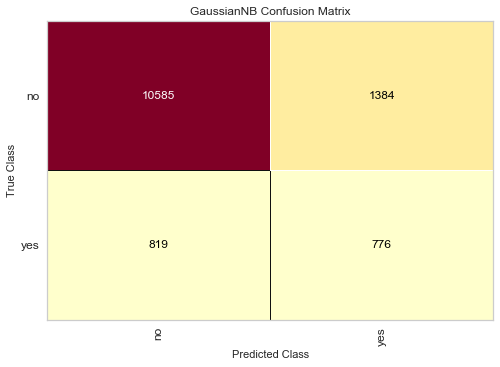

In [140]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

# Interpretando a Confusion Matrix
* Temos que 10585 no foram classificados como no e 1384 no que foram classificados como yes
* Temos que 776 yes foram classificados como yes e 819 yes que foram classificados como no